In [2]:
# import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 

In [3]:
!unzip Data.zip

Streaming output truncated to the last 5000 lines.
 extracting: Data/5/img006-00085.png  
 extracting: Data/5/img006-00086.png  
 extracting: Data/5/img006-00087.png  
 extracting: Data/5/img006-00088.png  
 extracting: Data/5/img006-00089.png  
 extracting: Data/5/img006-00090.png  
 extracting: Data/5/img006-00091.png  
 extracting: Data/5/img006-00092.png  
 extracting: Data/5/img006-00093.png  
 extracting: Data/5/img006-00094.png  
 extracting: Data/5/img006-00095.png  
 extracting: Data/5/img006-00096.png  
 extracting: Data/5/img006-00097.png  
 extracting: Data/5/img006-00098.png  
 extracting: Data/5/img006-00099.png  
 extracting: Data/5/img006-00100.png  
 extracting: Data/5/img006-00101.png  
 extracting: Data/5/img006-00102.png  
 extracting: Data/5/img006-00103.png  
 extracting: Data/5/img006-00104.png  
 extracting: Data/5/img006-00105.png  
 extracting: Data/5/img006-00106.png  
 extracting: Data/5/img006-00107.png  
 extracting: Data/5/img006-00108.png  
 extracting: 

In [37]:
# Get the data
classes = 10
images = []
labels = []

for i in range(classes):
  base = 'Data/' + str(i)
  imgList = os.listdir(base)
  for name in imgList:
    img = cv2.imread(base + '/' + str(name))
    img = cv2.resize(img, (28,28))
    images.append(img)
    labels.append(i)

print("Number of images: {}".format(len(images)))
print("Number of labels: {}".format(len(labels)))

Number of images: 10160
Number of labels: 10160


In [38]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(10160, 28, 28, 3)
(10160,)


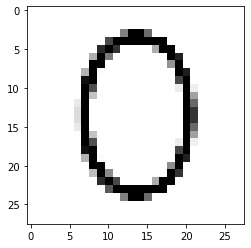

In [39]:
plt.imshow(images[10])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


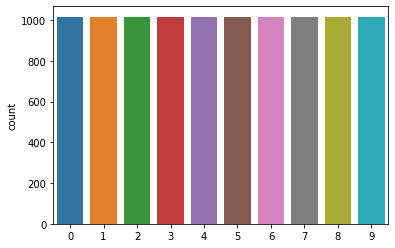

In [40]:
import seaborn as sns
sns.countplot(labels)

## Split data into Train, Validation and Test sets

In [41]:
# Split train, validation and test with ratio 60% - 20% - 20%
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2)
print("Train set shape: {}".format(x_train.shape))
print("Validation set shape: {}".format(x_val.shape))
print("Test set shape: {}".format(x_test.shape))

Train set shape: (6096, 28, 28, 3)
Validation set shape: (2032, 28, 28, 3)
Test set shape: (2032, 28, 28, 3)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


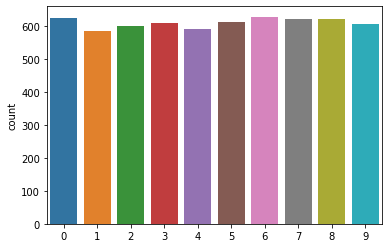

In [42]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


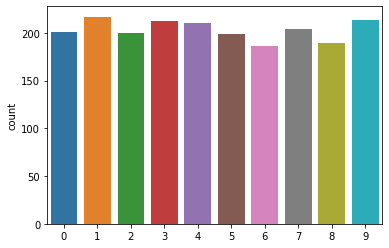

In [43]:
sns.countplot(y_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


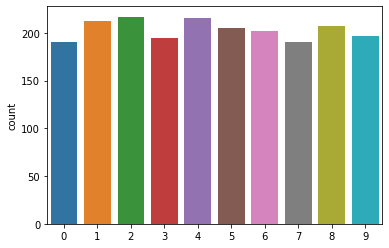

In [44]:
sns.countplot(y_test)

### Preprocessing the data

In [45]:
def preprocess(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  x, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  img = img/255.
  return img

x_train = np.array(list(map(preprocess, x_train)))
x_val = np.array(list(map(preprocess, x_val)))
x_test = np.array(list(map(preprocess, x_test)))

In [46]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### CNN Model

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

In [48]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

### Data Augementation

In [50]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)

datagen.fit(x_train)

#### Callback function

In [51]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy')>0.995):
      self.model.stop_training = True

In [52]:
callbacks = callback()
history = model.fit(datagen.flow(x_train, y_train), 
                    epochs=30, 
                    validation_data=(x_val, y_val),
                     callbacks=[callbacks])

Epoch 1/30
191/191 [==============================] - 26s 12ms/step - loss: 1.7994 - accuracy: 0.3361 - val_loss: 0.4569 - val_accuracy: 0.8789
Epoch 2/30
191/191 [==============================] - 2s 12ms/step - loss: 0.5648 - accuracy: 0.8258 - val_loss: 0.1568 - val_accuracy: 0.9508
Epoch 3/30
191/191 [==============================] - 2s 12ms/step - loss: 0.3377 - accuracy: 0.8957 - val_loss: 0.0893 - val_accuracy: 0.9680
Epoch 4/30
191/191 [==============================] - 2s 12ms/step - loss: 0.2379 - accuracy: 0.9277 - val_loss: 0.0615 - val_accuracy: 0.9779
Epoch 5/30
191/191 [==============================] - 2s 12ms/step - loss: 0.1891 - accuracy: 0.9413 - val_loss: 0.0571 - val_accuracy: 0.9823
Epoch 6/30
191/191 [==============================] - 2s 12ms/step - loss: 0.1657 - accuracy: 0.9506 - val_loss: 0.0413 - val_accuracy: 0.9862
Epoch 7/30
191/191 [==============================] - 2s 12ms/step - loss: 0.1468 - accuracy: 0.9531 - val_loss: 0.0341 - val_accuracy: 0.987

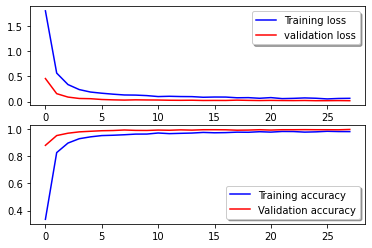

In [53]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Evaluating the model on Test set

In [54]:
score = model.evaluate(x_test, y_test, verbose = 1)
print("Test score : {}\nTest accuracy: {}".format(score[0], score[1]))

64/64 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9951
Test score : 0.014669830910861492
Test accuracy: 0.9950787425041199


### Saving the model

In [55]:
model.save("Digit_Recognizer.h5")